<img src='https://investigaciones.uniandes.edu.co/wp-content/themes/vicerrectoria001/images/logo2.png'>
<h1> 
 Departamento de Ingeniería Industrial<br>
 Modelos Avanzados de Análisis de Datos 1<br>
 MIIA<br>
 </h1>
 <ul>
    <li>Angela Fernanda Romero Fonseca - 201819276</li>
    <li>Carlos Francisco Silva Ortiz - 201920463</li>
    <li>Daniela Carolina Sanabria Guerrero -201116798</li>
    <li>Juan Camilo Florez - 201620135</li>
</ul>



## Análisis de quejas y reclamos:

A continuación se analizará una serie de tiempo en la cual se tiene la información del número de quejas y reclamos recibidas día a día para la línea de negocio ARL desde el año 2018 a la fecha; esta línea de negocio está encargada de atender a todas aquellas personas que cuentan con una póliza en la cual se le cubran todos los gastos en caso de sufrir un accidente laboral.

Analizar esta serie y su comportamiento es de vital importancia para la compañía ya que en la medida que se controle y entienda el comportamientos de las quejas y reclamos se podrán prestar soluciones oportunas y anticipadas a los clientes, lo cual contribuirá en una mejora de en la calidad del servicio y el reconocimiento de la compañía.

De esta manera, se realizará un modelo de análisis de series de tiempo ARIMA para anticipar el número de quejas en un horizonte temporal de un mes desde el xx de junio hasta el xx de julio de 2020.

In [28]:
%matplotlib notebook
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set()

In [29]:
df = pd.read_csv('datasets\quejas_ARL.csv', sep=';')
df['Quejas'] = np.log(df['Quejas'])
df['Quejas'][np.isneginf(df['Quejas'])] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
festivos = list()
for date in holidays.CO(years=(2017,2018,2019,2020)).items():
  festivos.append(str(date[0]))

festivos.append('2020-06-29')
festivos.append('2020-07-20')

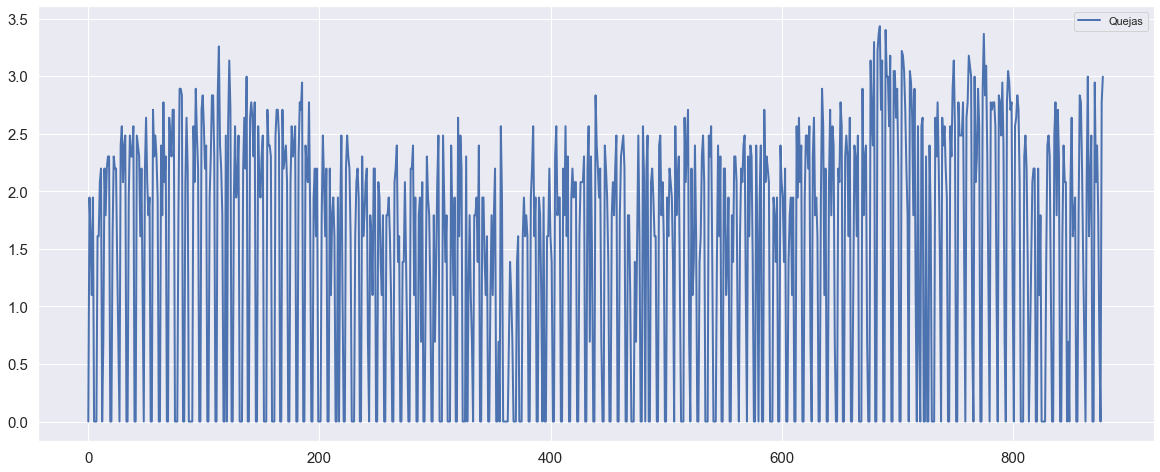

In [31]:
df.plot(figsize=(20,8), linewidth=2, fontsize=15);

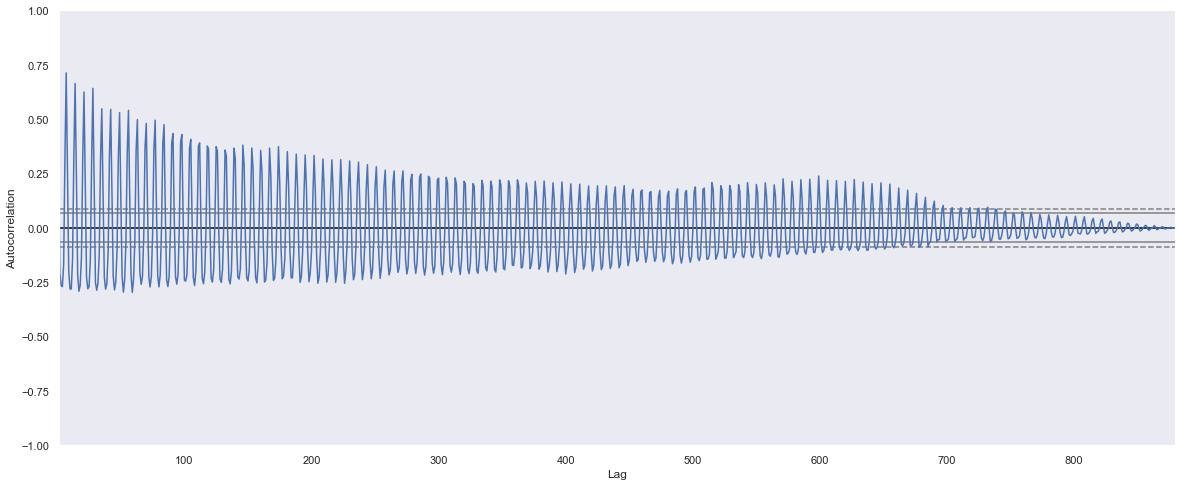

In [32]:
plt.figure(figsize=(20,8))
pd.plotting.autocorrelation_plot(df['Quejas']);

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Quejas'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.402515
p-value: 0.010873
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


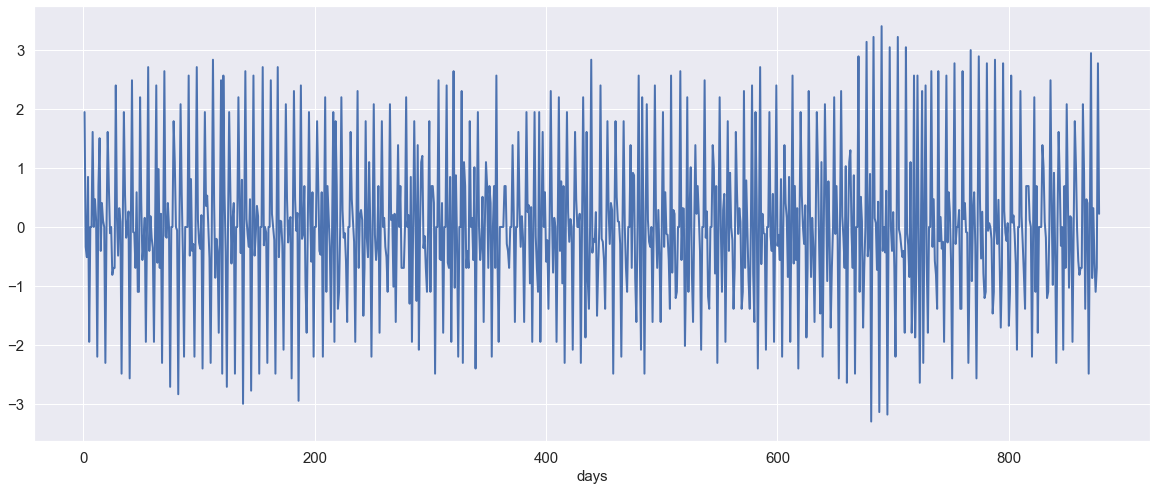

In [34]:
df['Quejas'].diff().plot(figsize=(20,8), linewidth=2, fontsize=15)
plt.xlabel('days', fontsize=15);

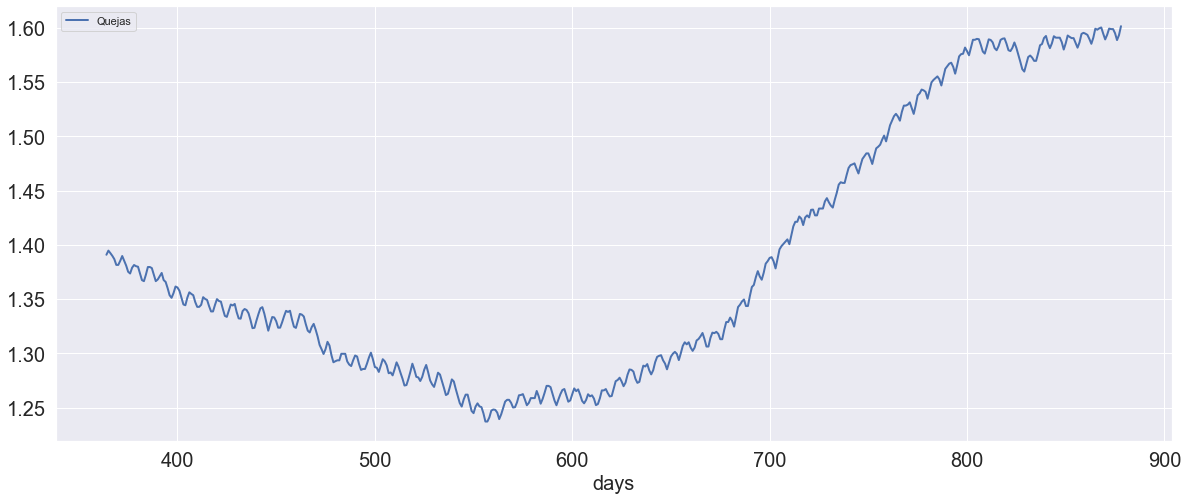

In [35]:
df.rolling(365).mean().plot(figsize=(20,8), linewidth=2, fontsize=20)
plt.xlabel('days', fontsize=20);

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Quejas'].diff().iloc[1:,])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.754439
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


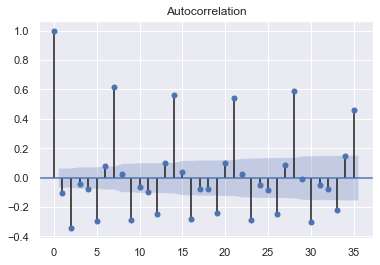

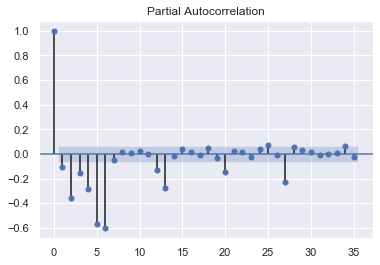

In [27]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df['Quejas'].diff().iloc[1:,], lags=35);
sm.graphics.tsa.plot_pacf(df['Quejas'].diff().iloc[1:,], lags=35);

# Construcción del modelo

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

X = df['Quejas'].values
size = int(len(X) * 0.9)
mse = list()

for p in range(15):
    for q in range(15):
        for d in range(3):
            try:
              if (q>=p):
                mse.append([p,d,q,99999])
                print([p,d,q,99999])
              else: 
                train, test = X[0:size], X[size:len(X)]
                history = [x for x in train]
                predictions = list()
                for t in range(len(test)):
                    model = ARIMA(history, order=(p,d,q))
                    model_fit = model.fit(disp=0)
                    output = model_fit.forecast()
                    yhat = output[0]
                    predictions.append(yhat)
                    obs = test[t]
                    history.append(obs)
                mse.append([p,d,q,mean_squared_error(test, predictions) ** 0.5])
                print([p,d,q,mean_squared_error(test, predictions) ** 0.5])
            except:
                mse.append([p,d,q,99999])
                print([p,d,q,99999])

[0, 0, 0, 99999]
[0, 1, 0, 99999]
[0, 2, 0, 99999]
[0, 0, 1, 99999]
[0, 1, 1, 99999]
[0, 2, 1, 99999]
[0, 0, 2, 99999]
[0, 1, 2, 99999]
[0, 2, 2, 99999]
[0, 0, 3, 99999]
[0, 1, 3, 99999]
[0, 2, 3, 99999]
[0, 0, 4, 99999]
[0, 1, 4, 99999]
[0, 2, 4, 99999]
[0, 0, 5, 99999]
[0, 1, 5, 99999]
[0, 2, 5, 99999]
[0, 0, 6, 99999]
[0, 1, 6, 99999]
[0, 2, 6, 99999]
[0, 0, 7, 99999]
[0, 1, 7, 99999]
[0, 2, 7, 99999]
[0, 0, 8, 99999]
[0, 1, 8, 99999]
[0, 2, 8, 99999]
[0, 0, 9, 99999]
[0, 1, 9, 99999]
[0, 2, 9, 99999]
[0, 0, 10, 99999]
[0, 1, 10, 99999]
[0, 2, 10, 99999]
[0, 0, 11, 99999]
[0, 1, 11, 99999]
[0, 2, 11, 99999]
[0, 0, 12, 99999]
[0, 1, 12, 99999]
[0, 2, 12, 99999]
[0, 0, 13, 99999]
[0, 1, 13, 99999]
[0, 2, 13, 99999]
[0, 0, 14, 99999]
[0, 1, 14, 99999]
[0, 2, 14, 99999]
[1, 0, 0, 1.0128307665685923]
[1, 1, 0, 1.2099006070842733]
[1, 2, 0, 1.606391345023592]
[1, 0, 1, 99999]
[1, 1, 1, 99999]
[1, 2, 1, 99999]
[1, 0, 2, 99999]
[1, 1, 2, 99999]
[1, 2, 2, 99999]
[1, 0, 3, 99999]
[1, 1, 3, 99

# Prophet

In [109]:
import os
os.environ["NUMEXPR_MAX_THREADS"]="16"

df.columns =['ds','y']
df['ds'] = pd.to_datetime(df['ds'],format='%d/%m/%Y')
feriados = pd.DataFrame({
  'holiday': 'colombia',
  'ds': pd.to_datetime(festivos),
  'lower_window': 0,
  'upper_window': 1,
})

feriados.tail(10)
m = Prophet(holidays = feriados,daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False,interval_width=0.90, changepoint_prior_scale=0.01)
m.fit(df);

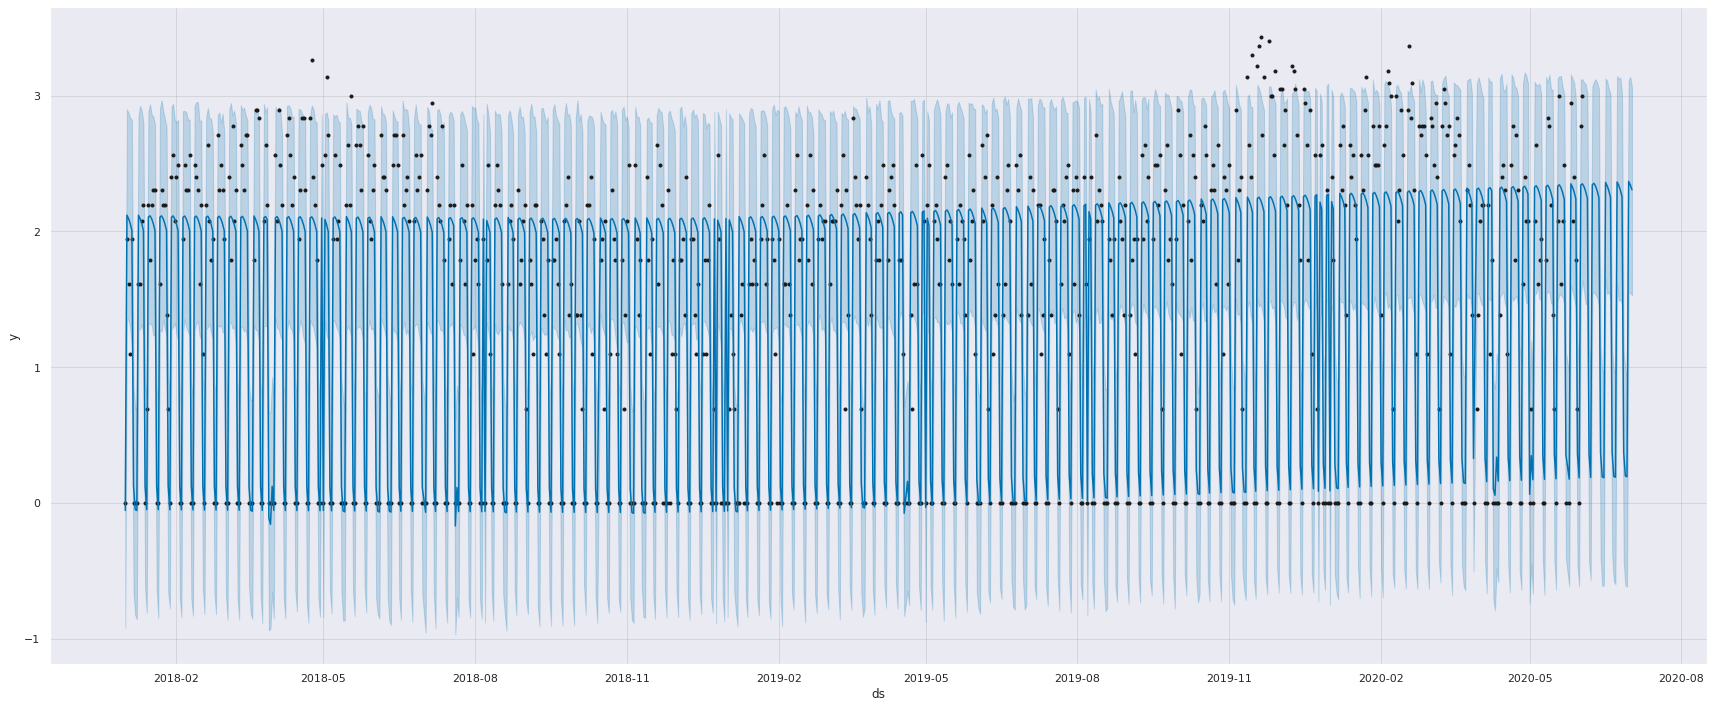

In [110]:
future = m.make_future_dataframe(periods= 30, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
m.plot(forecast,figsize=(24,10));

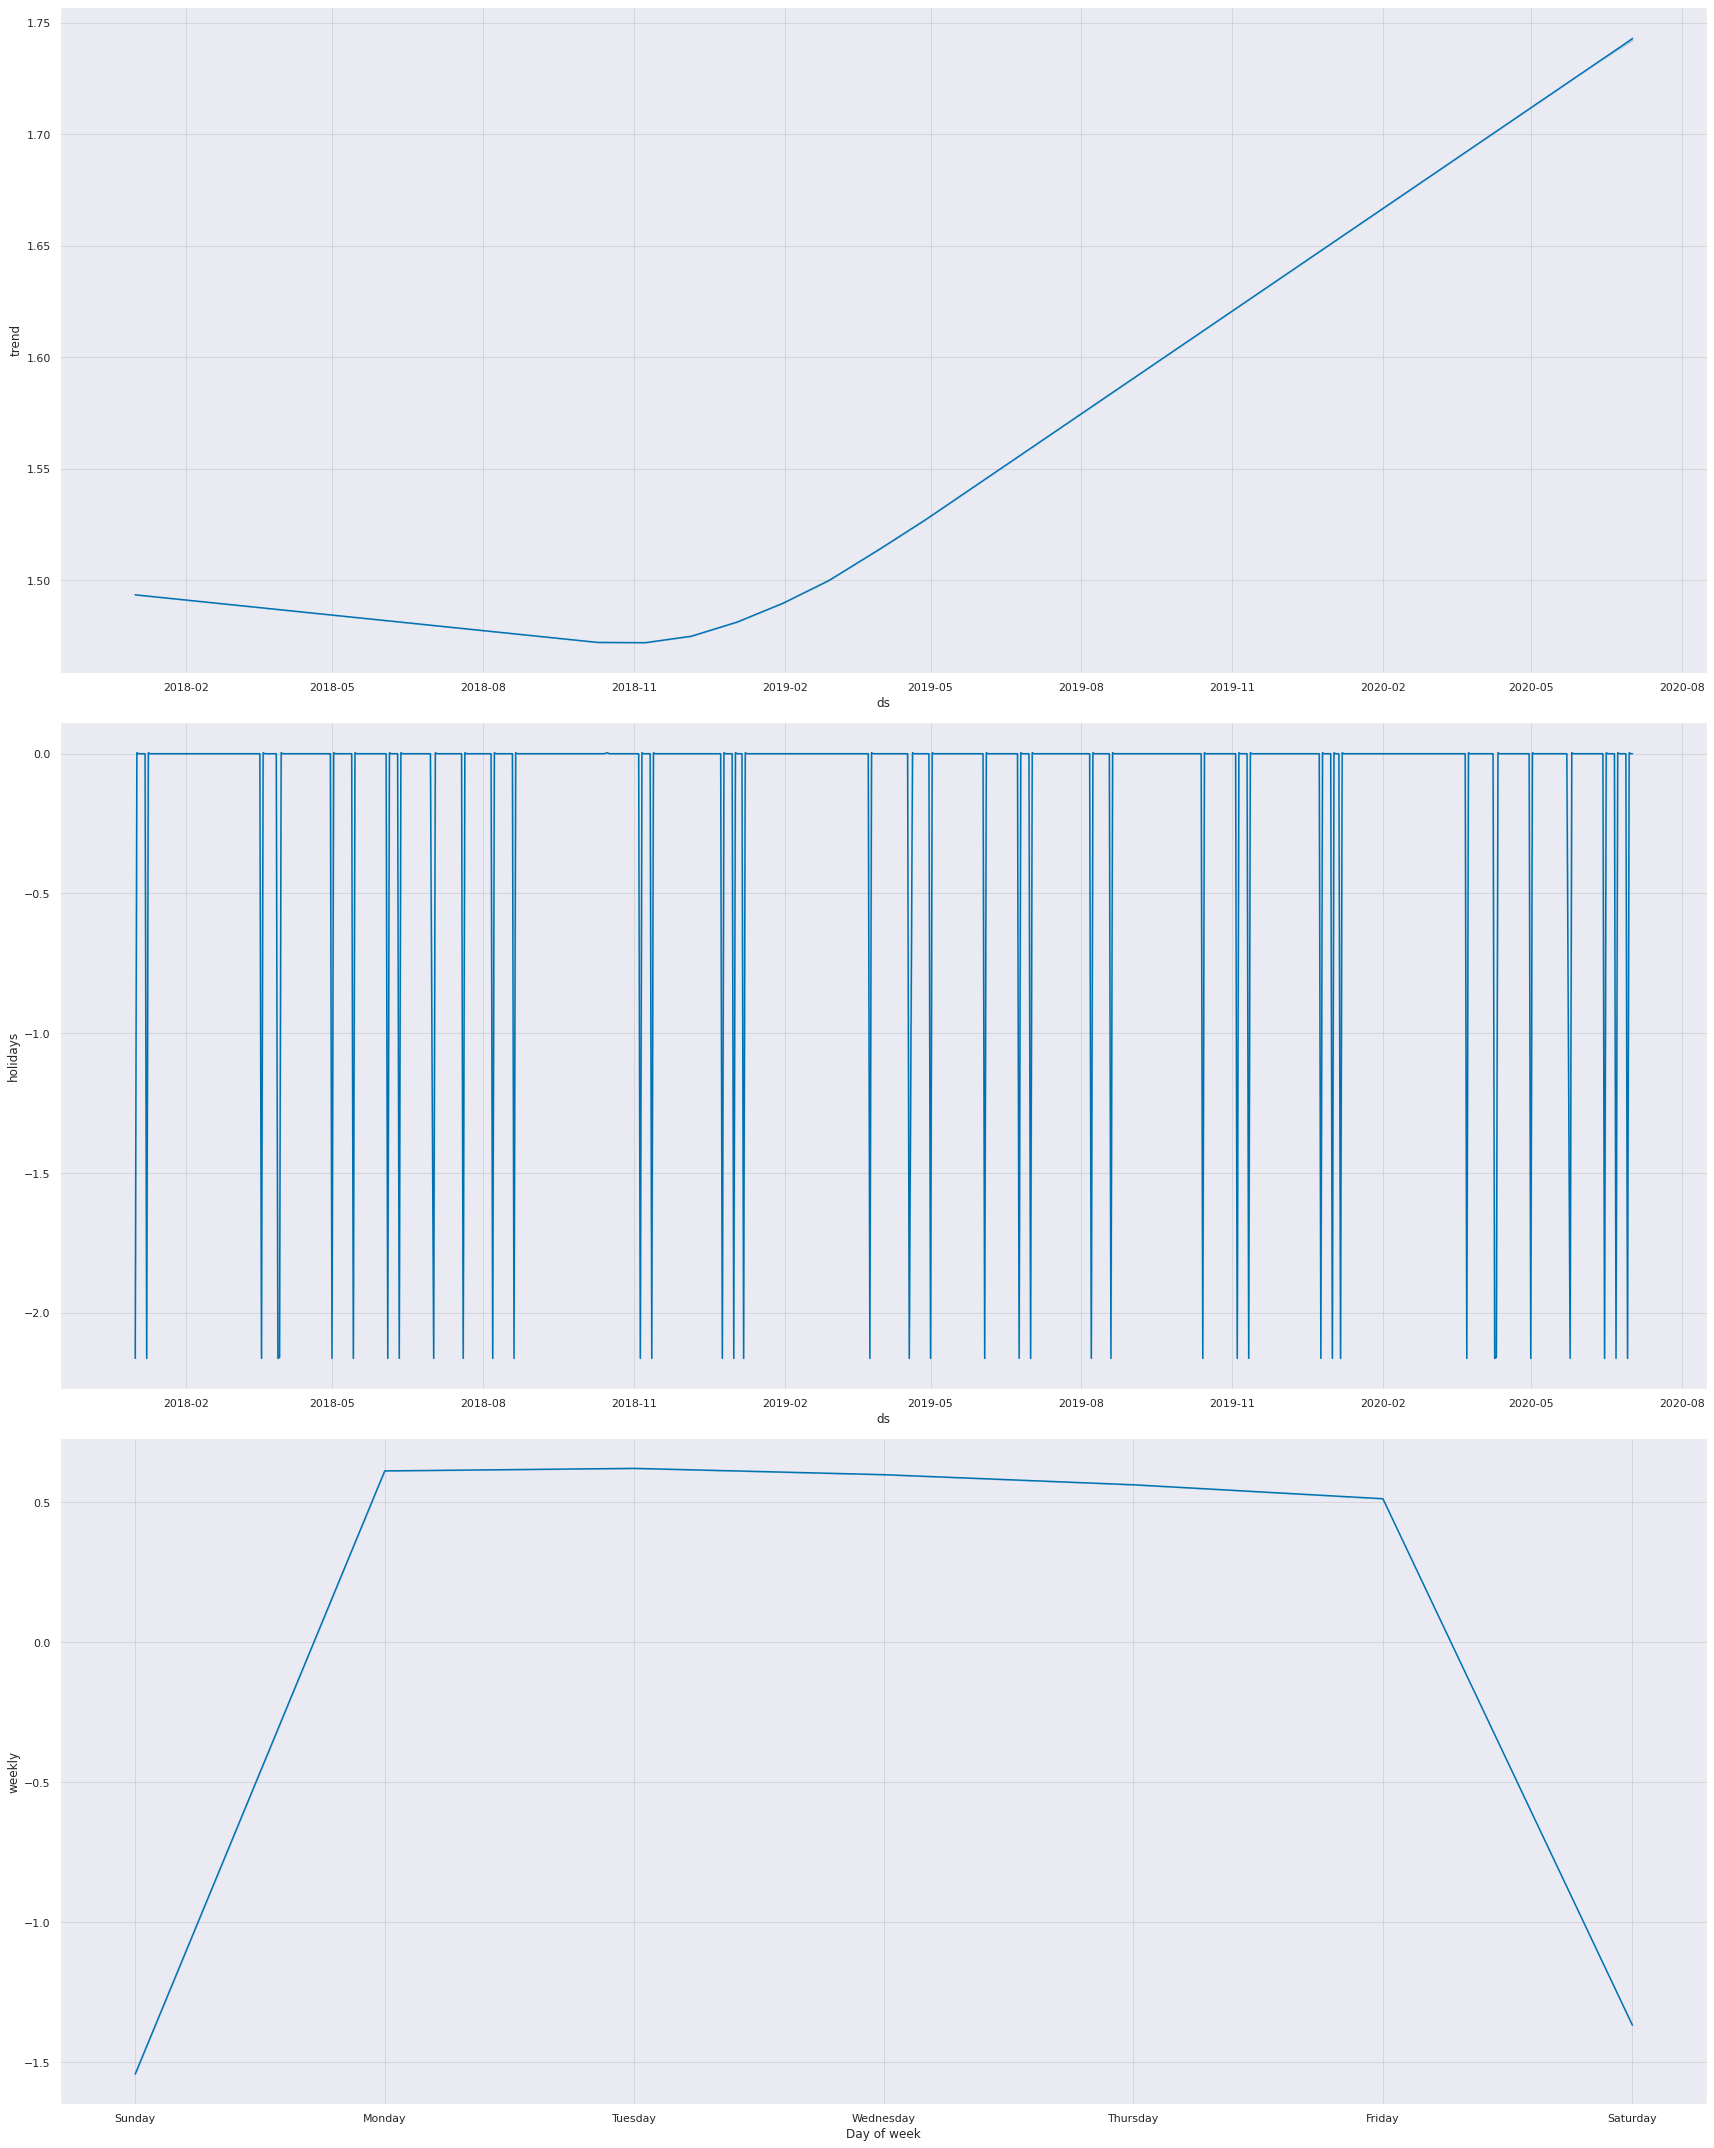

In [111]:
m.plot_components(forecast, figsize=(24,30));

In [112]:
size = int(len(df['y']) * 0.9)
train = df[:size]
test = df[size:]
predictions = np.zeros(len(test))
for t in range(len(test)):
    m = Prophet(holidays = feriados,daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False,interval_width=0.90, changepoint_prior_scale=0.01)
    m.fit(train)
    future=pd.DataFrame(df['ds'][:(size+t+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    forecast.columns = ['ds','y']
    train = train.append(forecast)
    predictions[t] = forecast[['y']].values
    mse = mean_squared_error(test['y'].values, predictions) ** 0.5
print('MSE: %.2f' % mse)

MSE: 0.52


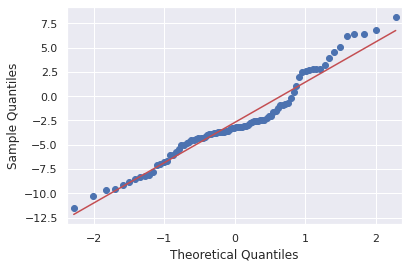

In [113]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
qqplot(error, line='s')
pyplot.show();

In [114]:
from scipy.stats import normaltest
stat, p = normaltest(error)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)') 

Statistics=4.559, p=0.102
Sample looks Gaussian (fail to reject H0)


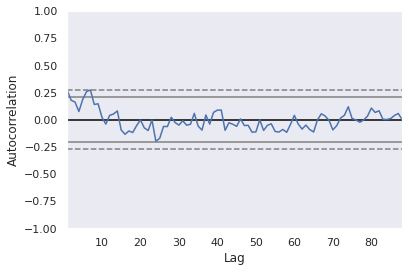

In [115]:
pd.plotting.autocorrelation_plot(error);